In [4]:
##load all the necessary data sets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
##load data
data = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Data science\CodeAlpha\Task1\tested.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
##describe about the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
##check duplicates
data.duplicated().sum()

0

In [10]:
##check null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
##remove duplicates
df = data.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
survived = df['Survived'].value_counts()
survived

Survived
1    44
0    43
Name: count, dtype: int64

In [19]:
pclass_number = df['Pclass'].value_counts()
pclass_number

Pclass
1    78
2     6
3     3
Name: count, dtype: int64

In [16]:
##perform auto eda
##sweetviz
import sweetviz as sz
report = sz.analyze(df)
report.show_html()

C:\Users\ADMIN\.conda\envs\session\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
##dtale
import dtale
report = dtale.show(df)
report.open_browser()


Text(0.5, 1.0, 'survivers and non survivers in titan')

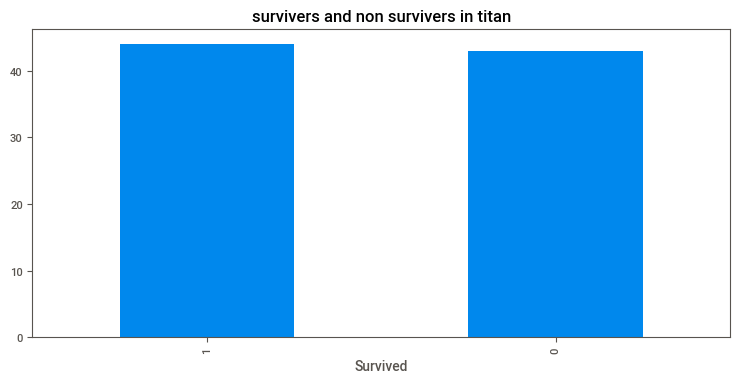

In [26]:
##plot graphs
##bar graph
plt.figure(figsize= (9,4))
survived.plot(kind = 'bar')
plt.title('survivers and non survivers in titan')

2024-10-24 01:23:46,304 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-24 01:23:46,321 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'number of persons travel in each class')

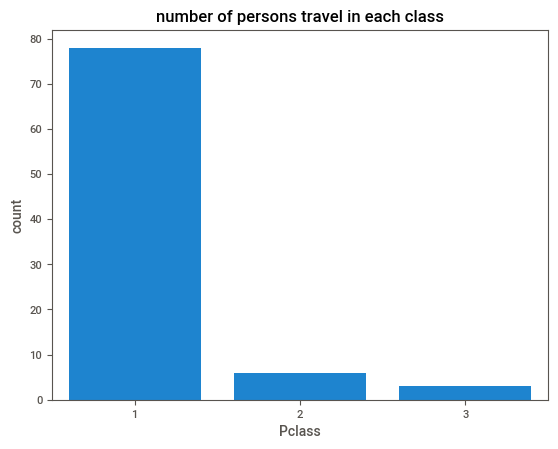

In [41]:
##plot bar graph
##number of persons travel in each class
snb.countplot(x = df['Pclass'])
plt.title('number of persons travel in each class')

In [33]:
##number of pasangers survive in each class
survived_class = df[['Survived','Pclass']].groupby('Pclass').sum()
survived_class

,Survived
Pclass,
1,40
2,3
3,1


Text(0.5, 1.0, 'survived number per each class')

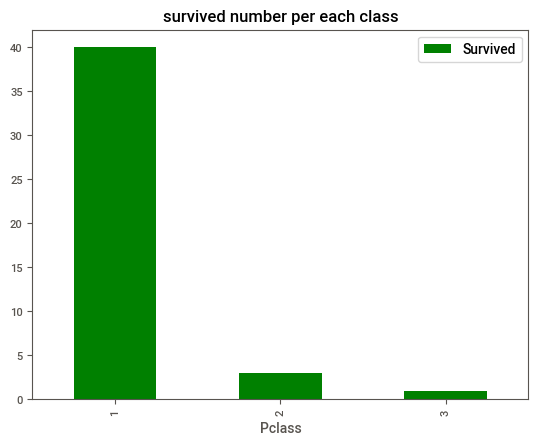

In [39]:
##plot bar graph
survived_class.plot(kind = 'bar',color = ['green'])
plt.title('survived number per each class')

In [42]:
gender_wise_survived = df[['Sex','Survived']].groupby('Sex').sum()
gender_wise_survived

,Survived
Sex,
female,44
male,0


Text(0.5, 1.0, 'number of survived each gender')

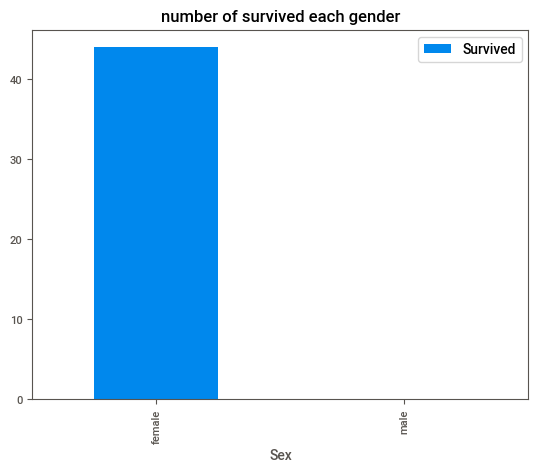

In [45]:
gender_wise_survived.plot(kind = 'bar')
plt.title('number of survived each gender')

In [49]:
##survival_number_age_wise
survived_age = df[['Age','Survived']].groupby('Age').sum()
survived_age

,Survived
Age,
1.0,1
6.0,0
12.0,1
13.0,0
18.0,2
18.5,0
20.0,0
22.0,2
23.0,2


Text(0.5, 1.0, 'survival_number_age_wise')

<Figure size 2000x700 with 0 Axes>

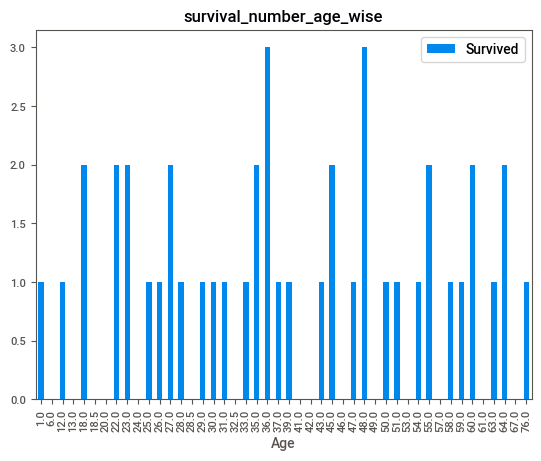

In [55]:
##bar plot
plt.figure(figsize = (20,7))
survived_age.plot(kind = 'bar')
plt.title('survival_number_age_wise')

In [62]:
df= df.drop(columns = ['Name','Ticket','Cabin','Embarked'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
12,904,1,1,female,23.0,1,0,82.2667
14,906,1,1,female,47.0,1,0,61.1750
24,916,1,1,female,48.0,1,3,262.3750
26,918,1,1,female,22.0,0,1,61.9792
28,920,0,1,male,41.0,0,0,30.5000
...,...,...,...,...,...,...,...,...
404,1296,0,1,male,43.0,1,0,27.7208
405,1297,0,2,male,20.0,0,0,13.8625
407,1299,0,1,male,50.0,1,1,211.5000
411,1303,1,1,female,37.0,1,0,90.0000


In [63]:
##split dataset in to input and output
x = df.drop(columns = ['Survived'])
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
12,904,1,female,23.0,1,0,82.2667
14,906,1,female,47.0,1,0,61.1750
24,916,1,female,48.0,1,3,262.3750
26,918,1,female,22.0,0,1,61.9792
28,920,1,male,41.0,0,0,30.5000
...,...,...,...,...,...,...,...
404,1296,1,male,43.0,1,0,27.7208
405,1297,2,male,20.0,0,0,13.8625
407,1299,1,male,50.0,1,1,211.5000
411,1303,1,female,37.0,1,0,90.0000


In [64]:
y = df['Survived']
y

12     1
14     1
24     1
26     1
28     0
      ..
404    0
405    0
407    0
411    1
414    1
Name: Survived, Length: 87, dtype: int64

In [65]:
##do label encoding
label_encoder = LabelEncoder()
x['Sex'] = label_encoder.fit_transform(x['Sex'])

In [67]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [68]:
# Model: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [70]:
# Prediction
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [71]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[ 8  0]
 [ 0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [74]:
# Feature Importance
features = ['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print("Feature Importances:\n", feature_importance)

Feature Importances:
 Sex            0.717844
PassengerId    0.086725
Fare           0.083698
Age            0.055024
Parch          0.032230
SibSp          0.016994
Pclass         0.007485
dtype: float64
